In [48]:
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import Rbf


from mpl_toolkits.axes_grid1 import make_axes_locatable

#import seaborn as sns
#sns.set_context('paper', font_scale=1.5)

In [47]:
sns.set_context?

In [5]:
def circle(number_of_points, radius=1., examples=(1,-1)):
    a = np.linspace(-1.0, 1.0, number_of_points+1)[:-1]
    b = np.linspace(-1.0, 1.0, number_of_points+1)[:-1]
    
    x = -np.cos(np.pi*a)*radius
    y = np.sin(np.pi*b)*radius
    
    values = np.array(examples*(number_of_points//len(examples)+1))[:number_of_points]
    
    return x,y, values   

In [6]:
x,y,values = circle(6)
x.shape, y.shape, values.shape

((6,), (6,), (6,))

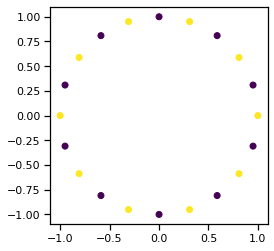

In [7]:
x,y,values = circle(20)
plt.scatter(x,y,c=values, marker='o')
plt.gca().set_aspect('equal')

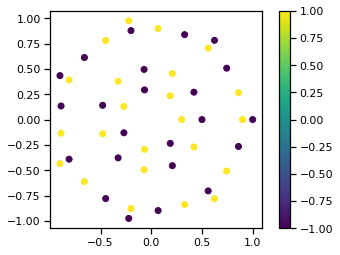

In [8]:
x,y,values = circle(7, radius=0.3, examples=(1,-1))
plt.scatter(x,y,c=values, marker='o')

x,y,values = circle(11, radius=0.5, examples=(-1,1))
plt.scatter(x,y,c=values, marker='o')

x,y,values = circle(21, radius=0.9, examples=(1,-1))
plt.scatter(x,y,c=values, marker='o')

x,y,values = circle(7, examples=(-1,1))
plt.scatter(x,y,c=values, marker='o')
plt.colorbar()
plt.gca().set_aspect('equal')

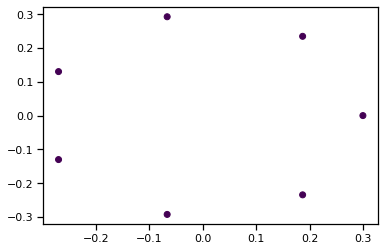

In [9]:
x,y,values = circle(7, radius=0.3, examples=(1,1))
plt.scatter(x,y,c=values, marker='o')

In [10]:
x0,y0,v0 = circle(7, radius=0.3, examples=(1,-1))
x1,y1,v1 = circle(11, radius=0.5, examples=(-1,1))
x2,y2,v2 = circle(21, radius=0.9, examples=(1,-1))
x3,y3,v3 = circle(7, radius=1.0, examples=(-1,1))

x_series = np.concatenate([x0,x1,x2,x3])
y_series = np.concatenate([y0,y1,y2,y3])
v_series = np.concatenate([v0,v1,v2,v3])

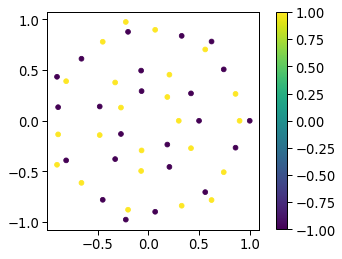

In [119]:
plt.scatter(x_series, y_series, c=v_series, marker='o')
plt.colorbar()
plt.gca().set_aspect('equal')

In [172]:
rbfi = Rbf(x_series, y_series, v_series, function='thin_plate', norm='euclidean', smooth=0.1)

In [173]:
x = np.linspace(-1.5, 1.5, 1000)
y = np.linspace(-1.5, 1.5, 1000)
xv, yv = np.meshgrid(x, y)

In [174]:
result = rbfi(xv, yv)
result.shape

(1000, 1000)

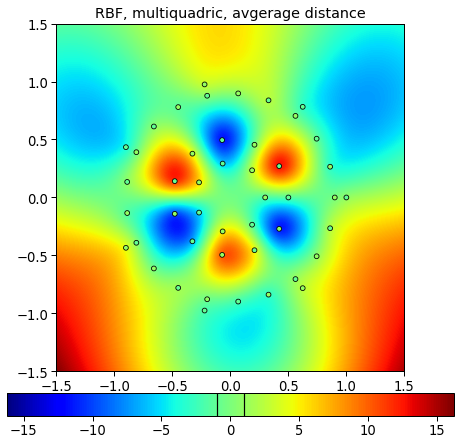

In [175]:
plt.figure(figsize=(8,8))
plt.title('RBF, multiquadric, avgerage distance')
plt.imshow(result, extent=[-1.5,1.5,-1.5,1.5], origin='lower',
           vmin=-np.abs(result).max(),
           vmax=np.abs(result).max(), cmap='jet'
          )
plt.scatter(x_series, y_series, c=v_series, marker='o', edgecolors='k',
           vmin=-np.abs(result).max(),
           vmax=np.abs(result).max(), cmap='jet'
           )
cb = plt.colorbar(orientation="horizontal", pad=0.05)
cb.ax.axvline(1, c='k')
cb.ax.axvline(-1, c='k')

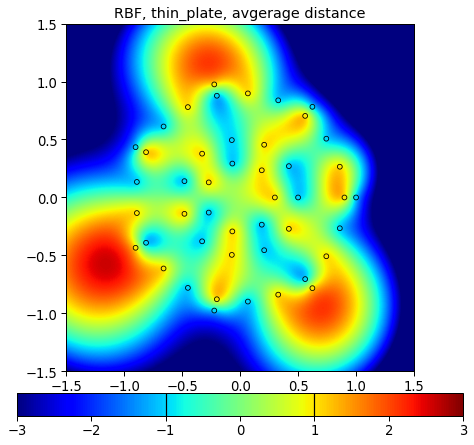

In [147]:
plt.figure(figsize=(8,8))
plt.title('RBF, thin_plate, avgerage distance')
plt.imshow(result, extent=[-1.5,1.5,-1.5,1.5], origin='lower',
           vmin=-3,
           vmax=3, cmap='jet'
          )
plt.scatter(x_series, y_series, c=v_series, marker='o', edgecolors='k',
           vmin=-3,
           vmax=3, cmap='jet'
           )
cb = plt.colorbar(orientation="horizontal", pad=0.05)
cb.ax.axvline(1, c='k')
cb.ax.axvline(-1, c='k')

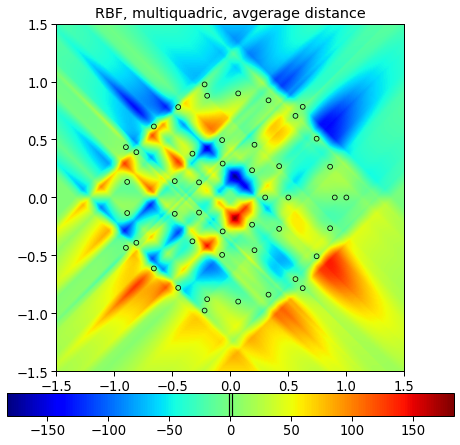

In [71]:
plt.figure(figsize=(8,8))
plt.title('RBF, multiquadric, avgerage distance')
plt.imshow(result, extent=[-1.5,1.5,-1.5,1.5], origin='lower',
           vmin=-np.abs(result).max(),
           vmax=np.abs(result).max(), cmap='jet'
          )
plt.scatter(x_series, y_series, c=v_series, marker='o', edgecolors='k',
           vmin=-np.abs(result).max(),
           vmax=np.abs(result).max(), cmap='jet'
           )
cb = plt.colorbar(orientation="horizontal", pad=0.05)
cb.ax.axvline(1, c='k')
cb.ax.axvline(-1, c='k')

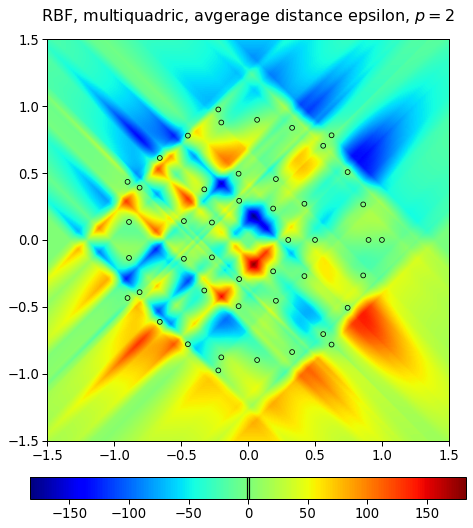

In [117]:
def draw_flower(x_series, y_series, v_series, image, title='title',
                figsize=(8,8), extent=[-1.5,1.5,-1.5,1.5], cmap='jet', title_fontsize=16):
    plt.figure(figsize=figsize)
    plt.title(title, fontdict={'fontsize':title_fontsize}, y=1.03)
    plt.imshow(image, extent=extent, origin='lower',
               vmin=-np.abs(image).max(),
               vmax=np.abs(image).max(), cmap=cmap
              )
    plt.scatter(x_series, y_series, c=v_series, marker='o', edgecolors='k',
               vmin=-np.abs(image).max(),
               vmax=np.abs(image).max(), cmap=cmap
               )
    cb = plt.colorbar(orientation="horizontal", pad=0.07, shrink=0.8)
    cb.ax.axvline(np.min(v_series), c='k')
    cb.ax.axvline(np.max(v_series), c='k')
    plt.tight_layout()
    
    
draw_flower(x_series, y_series, v_series, result,
           title='RBF, multiquadric, avgerage distance epsilon, $p=2$')

In [109]:
def flower_0():
    x0,y0,v0 = circle(7, radius=0.3, examples=(1,-1))
    x1,y1,v1 = circle(11, radius=0.5, examples=(-1,1))
    x2,y2,v2 = circle(21, radius=0.9, examples=(1,-1))
    x3,y3,v3 = circle(7, radius=1.0, examples=(-1,1))

    x_series = np.concatenate([x0,x1,x2,x3])
    y_series = np.concatenate([y0,y1,y2,y3])
    v_series = np.concatenate([v0,v1,v2,v3])
    
    return x_series, y_series, v_series

In [110]:
def rbf_analysis(x_series, y_series, v_series, extent=[-1.5,1.5,-1.5,1.5], resolution=1000, **argv):
    rbfi = Rbf(x_series, y_series, v_series, **argv)
    x = np.linspace(extent[0], extent[1], 1000)
    y = np.linspace(extent[2], extent[3], 1000)
    xv, yv = np.meshgrid(x, y)
    image = rbfi(xv, yv)
    return image

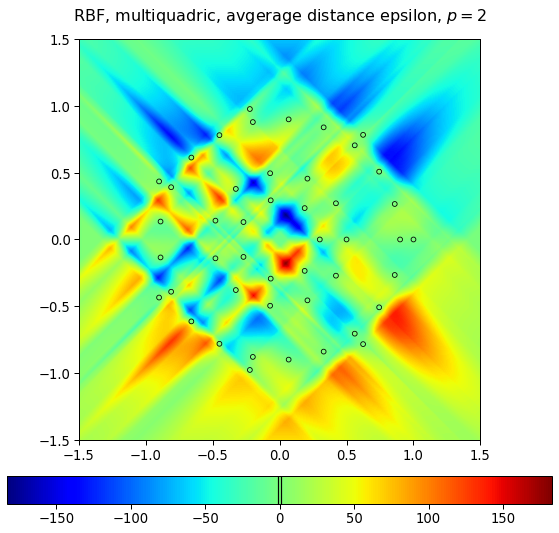

In [111]:
x_series, y_series, v_series = flower_0()
image = rbf_analysis(x_series, y_series, v_series, function='inverse', norm='chebyshev')

draw_flower(x_series, y_series, v_series, image,
           title='RBF, multiquadric, avgerage distance epsilon, $p=2$')
plt.savefig('rbf_multiquadric_avg_p2.png')

In [103]:
image